In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn scipy

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
# Load the dataset
data = pd.read_csv('hierarchical-clustering-with-python-and-scikit-learn-shopping-data.csv')
# Fill missing values
data.fillna(data.mean(), inplace=True)  # Mean imputation\
# Normalize the data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data.select_dtypes(include=[np.number]))


In [ ]:
from sklearn.preprocessing import LabelEncoder
# Apply label encoding
label_encoder = LabelEncoder()
for column in data.select_dtypes(include=['object']).columns:
    data[column] = label_encoder.fit_transform(data[column])
# If you want to see the encoded DataFrame
print(data.head())


   CustomerID  Age  Annual Income (k$)  Spending Score (1-100)
0           1   19                  15                      39
1           2   21                  15                      81
2           3   20                  16                       6
3           4   23                  16                      77
4           5   31                  17                      40


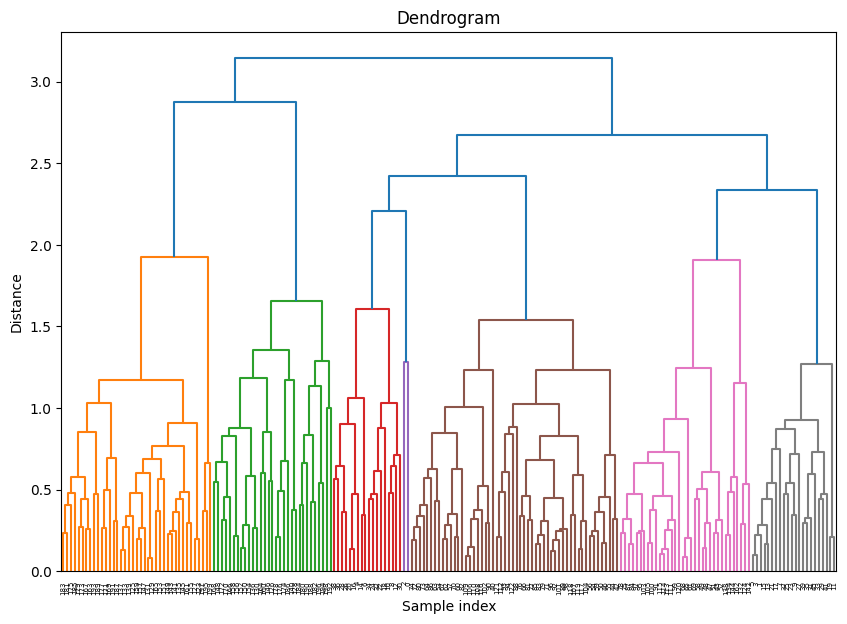

In [ ]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

def plot_dendrogram(data):
    linked = linkage(data, method='average')
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title('Dendrogram')
    plt.xlabel('Sample index')
    plt.ylabel('Distance')
    plt.show()

plot_dendrogram(data_normalized)

In [ ]:
from sklearn.cluster import AgglomerativeClustering
distance_metrics = ['euclidean', 'manhattan', 'cosine']
linkage_methods = ['ward', 'single', 'complete', 'average']

results = {}

for metric in distance_metrics:
    for linkage_method in linkage_methods:
        if metric == 'cosine' and linkage_method == 'average':
            continue
        try:
            clustering = AgglomerativeClustering(n_clusters=3,  linkage=linkage_method)
            cluster_labels = clustering.fit_predict(data_normalized)
            results[(metric, linkage_method)] = cluster_labels
        except ValueError as e:
            print(f"Error occurred for metric: {metric}, linkage: {linkage_method}")
            print(e)

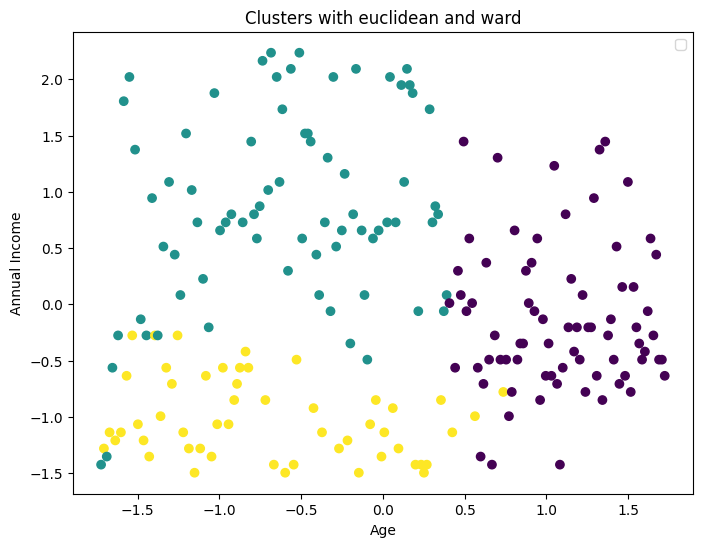

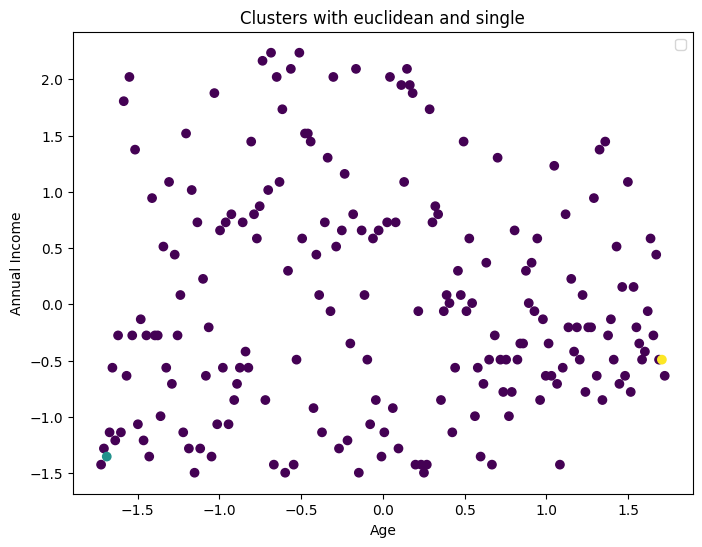

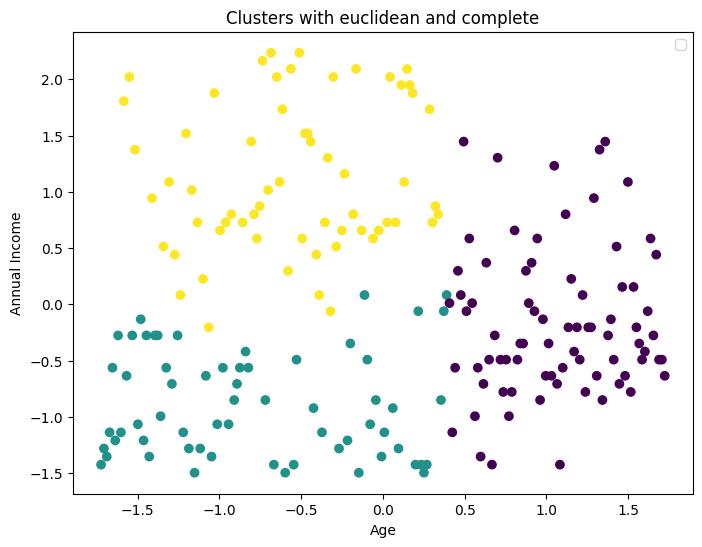

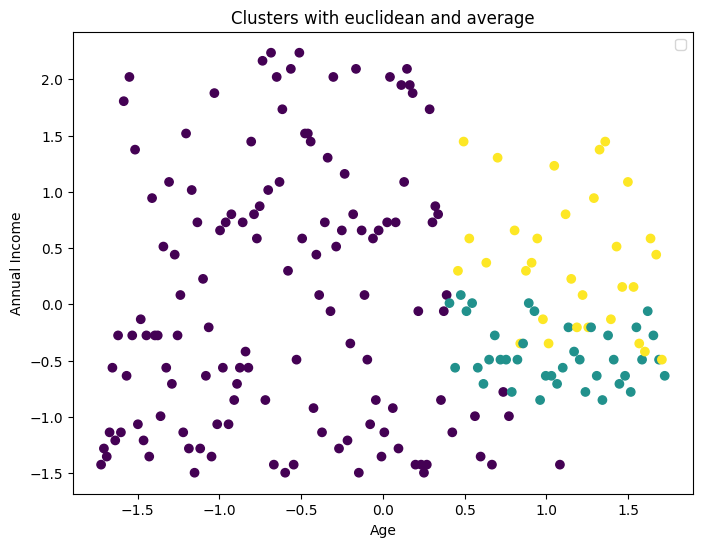

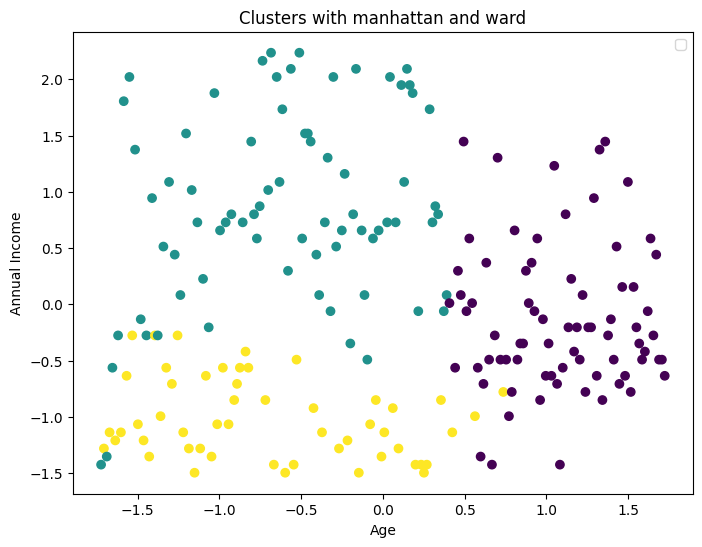

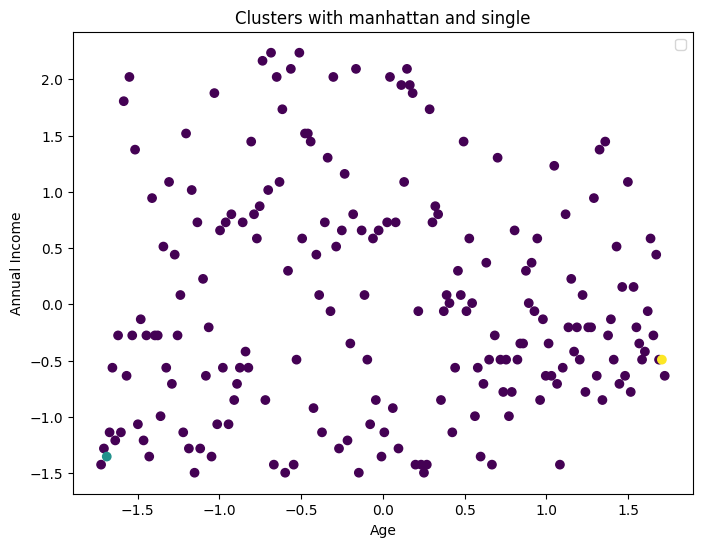

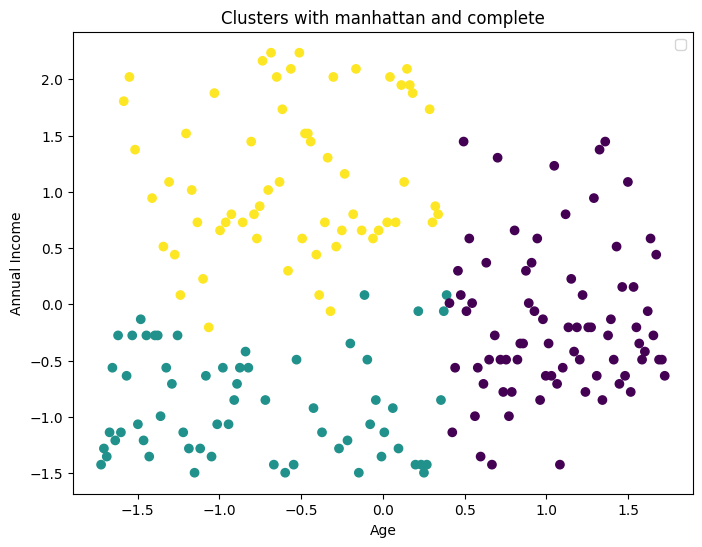

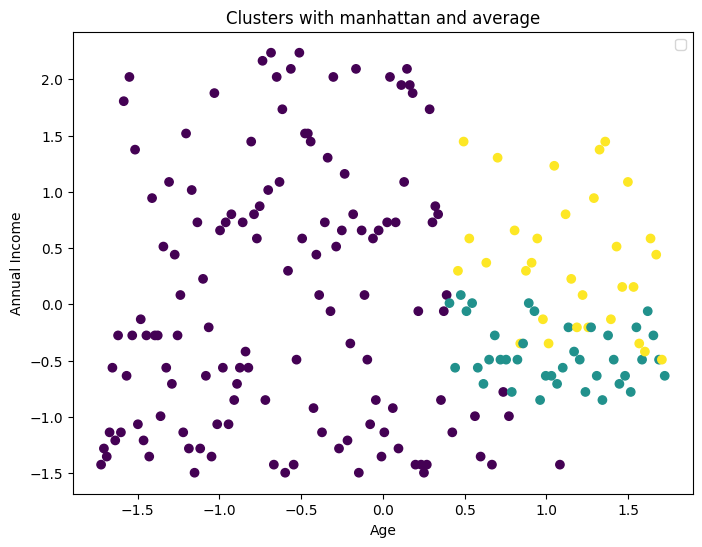

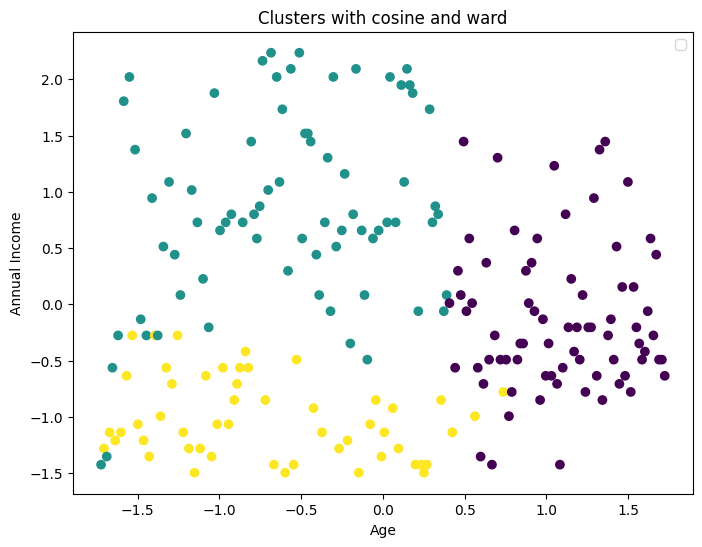

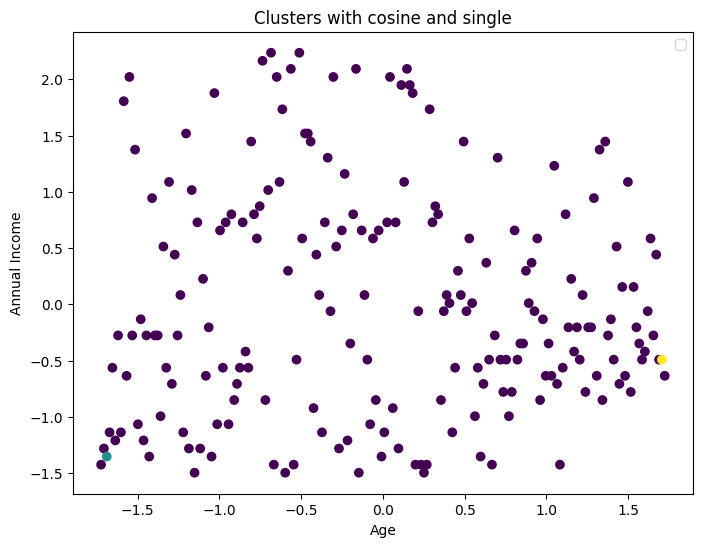

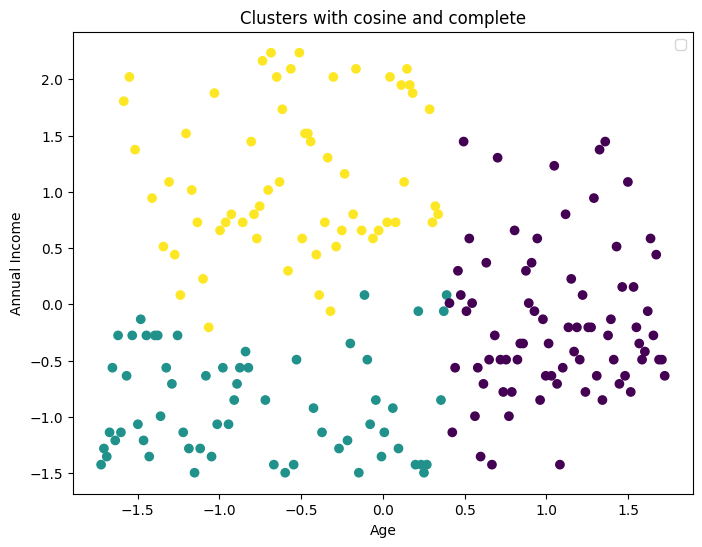

In [ ]:
def plot_scatter(data, cluster_labels, title):
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=cluster_labels, marker='o')
    plt.title(title)
    plt.xlabel('Age')
    plt.ylabel('Annual Income')
    plt.legend()
    plt.show()

# Using the first two attributes for scatter plot
for (metric, linkage_method), cluster_labels in results.items():
    plot_scatter(data_normalized[:, :2], cluster_labels, f'Clusters with {metric} and {linkage_method}')

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, mutual_info_score

# Assuming you have true labels for mutual information
# true_labels = data['true_label_column_name']  # Uncomment and set the true label column if available

for (metric, linkage_method), cluster_labels in results.items():
    silhouette = silhouette_score(data_normalized, cluster_labels)
    davies_bouldin = davies_bouldin_score(data_normalized, cluster_labels)
    # mutual_info = mutual_info_score(true_labels, cluster_labels)  # Uncomment if true labels are available

    print(f"Metric: {metric}, Linkage: {linkage_method}")
    print(f"Silhouette Score: {silhouette:.4f}")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")
    # print(f"Mutual Information: {mutual_info:.4f}")  # Uncomment if true labels are available
    print("-" * 50)

Metric: euclidean, Linkage: ward
Silhouette Score: 0.3087
Davies-Bouldin Index: 1.1303
--------------------------------------------------
Metric: euclidean, Linkage: single
Silhouette Score: 0.0992
Davies-Bouldin Index: 0.5491
--------------------------------------------------
Metric: euclidean, Linkage: complete
Silhouette Score: 0.3260
Davies-Bouldin Index: 1.0617
--------------------------------------------------
Metric: euclidean, Linkage: average
Silhouette Score: 0.3335
Davies-Bouldin Index: 0.9122
--------------------------------------------------
Metric: manhattan, Linkage: ward
Silhouette Score: 0.3087
Davies-Bouldin Index: 1.1303
--------------------------------------------------
Metric: manhattan, Linkage: single
Silhouette Score: 0.0992
Davies-Bouldin Index: 0.5491
--------------------------------------------------
Metric: manhattan, Linkage: complete
Silhouette Score: 0.3260
Davies-Bouldin Index: 1.0617
--------------------------------------------------
Metric: manhattan, 